<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


# Familiarization

Below general statistics of the data.

In [5]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [6]:
boston_df.groupby('CHAS')['CHAS'].agg('count')

CHAS
0.0    471
1.0     35
Name: CHAS, dtype: int64

# Descriptive statistics

Median: 21.2; First quartile: 17.0; Third quartile: 25.0 


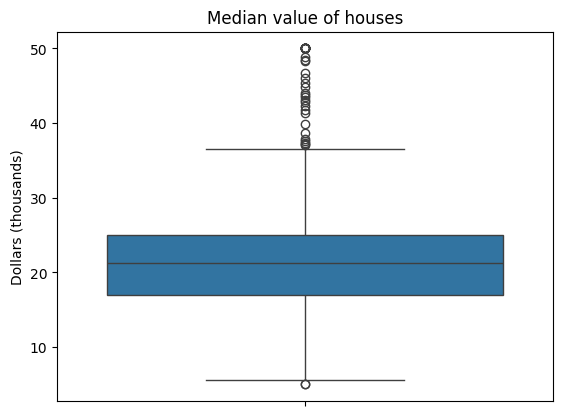

In [9]:
f,ax = pyplot.subplots()
sns.boxplot(boston_df.MEDV,ax=ax)
ax.set_title('Median value of houses')
ax.set_ylabel('Dollars (thousands)')
print("Median: {:.1f}; First quartile: {:.1f}; Third quartile: {:.1f} ".format(boston_df.MEDV.median(),boston_df.MEDV.quantile(0.25),boston_df.MEDV.quantile(0.75)))

The median value of the houses is 21,200 dollars, with 25% of houses with a value ≤ 17,000 dollars and 25% with a value > 25,000 dollars

Text(0.5, 0.98, 'Proximity of houses to Charles river')

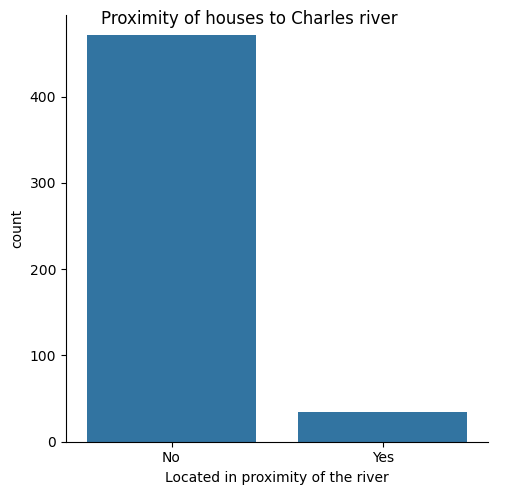

In [11]:
c = sns.catplot(x='CHAS',kind='count',data=boston_df)
c.set_xticklabels(['No','Yes'])
c.set_axis_labels('Located in proximity of the river','count')
pyplot.suptitle('Proximity of houses to Charles river')

35 houses are located near the river, while 471 are located not in proximity of the river

Text(0.5, 0.98, 'Relation between NOX concentration and industries')

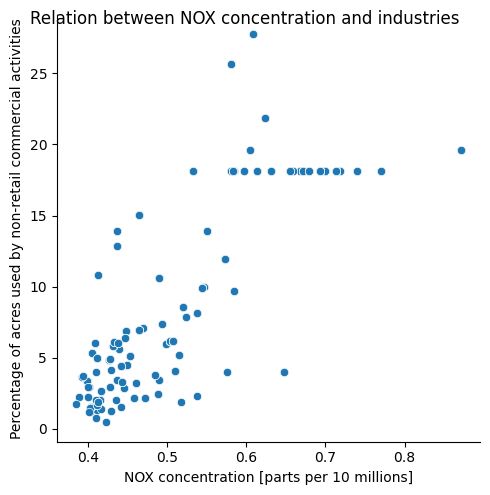

In [13]:
g = sns.relplot(data=boston_df,x='NOX',y='INDUS')
g.set_axis_labels('NOX concentration [parts per 10 millions]','Percentage of acres used by non-retail commercial activities')
pyplot.suptitle('Relation between NOX concentration and industries')

Text(0.5, 0, 'Age')

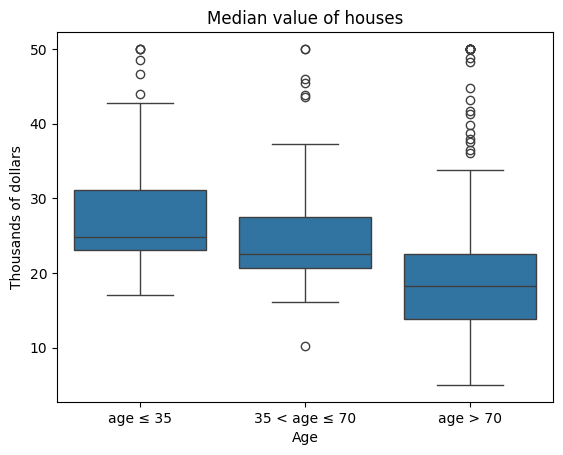

In [15]:
boston_df['age_group'] = ''
boston_df.loc[boston_df.AGE<=35,'age_group'] = 'age ≤ 35'
boston_df.loc[(boston_df.AGE>35)&(boston_df.AGE<=70),'age_group'] = '35 < age ≤ 70'
boston_df.loc[boston_df.AGE>70,'age_group'] = 'age > 70'
f,ax = pyplot.subplots()
sns.boxplot(data=boston_df,x='age_group',y='MEDV',ax=ax,order=['age ≤ 35','35 < age ≤ 70','age > 70'])
ax.set_title('Median value of houses')
ax.set_ylabel('Thousands of dollars')
ax.set_xlabel('Age')

Median value of houses drecreases with age.


<ipython-input-16-295d90ce165d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(boston_df.PTRATIO,ax=ax,kde=False)


Text(0.5, 1.0, 'Histogram of students/teachers ratio')

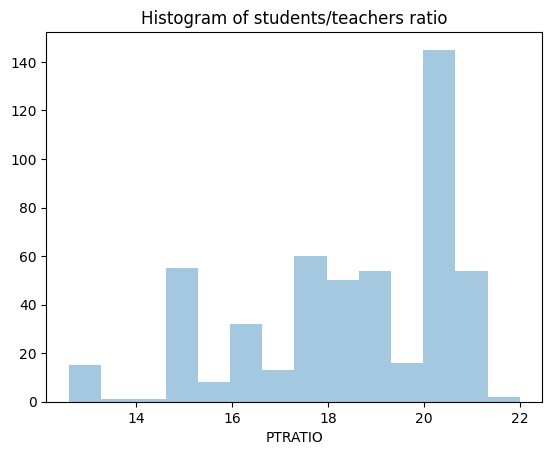

In [16]:
f,ax = pyplot.subplots()
sns.distplot(boston_df.PTRATIO,ax=ax,kde=False)
ax.set_title('Histogram of students/teachers ratio')

The students/teachers ratio varies from ≈14 to 22 with most values between ≈14.5 and ≈21.5 and a peak at ≈21

# Hypothesis testing

Is there a significant difference between the median value of houses in proximity of Charles river and those which are not near the river?

The null hypothesis $H_{0}$ is there is no difference in value between houses near or far from the river.

Below is the barplot of the mean of the median value

<ipython-input-17-3b92e4efb595>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(['Not proximal','In proximity'])


[Text(0, 0, 'Not proximal'), Text(1, 0, 'In proximity')]

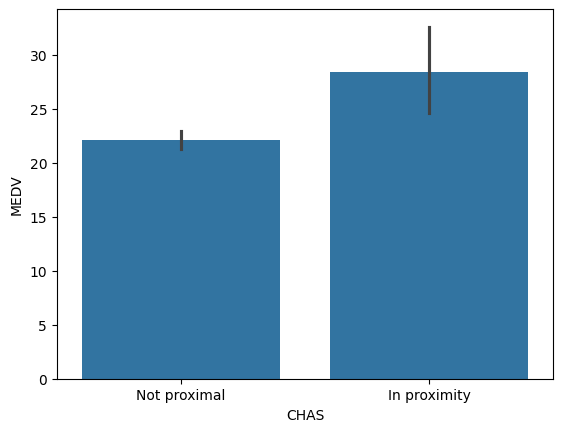

In [17]:
g = sns.barplot(data=boston_df,x='CHAS',y='MEDV')
g.set_xticklabels(['Not proximal','In proximity'])

In [18]:
scipy.stats.levene(boston_df[boston_df.CHAS == 0]['MEDV'],boston_df[boston_df.CHAS == 1]['MEDV'], center='mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

Since the p-value of Levene test is ≤ 0.05 we can reject the hypothesis of equality of variance between the 2 groups.

In [19]:
scipy.stats.ttest_ind(boston_df[boston_df.CHAS == 0]['MEDV'],boston_df[boston_df.CHAS == 1]['MEDV'],equal_var=False)

TtestResult(statistic=-3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

Since the p-value of the t test for independent samples is < 0.05 we can reject the null hypothesis. There is a significant difference in median value between houses near or far from the Charles river.

Is there a significant difference in median value of houses by age group?

Null hypothesis $N_{0}$ is there is no difference between age groups.

First we test for equality of variance:

In [20]:
medv_1 = boston_df[boston_df.age_group == 'age ≤ 35'].MEDV
medv_2 = boston_df[boston_df.age_group == '35 < age ≤ 70'].MEDV
medv_3 = boston_df[boston_df.age_group == 'age > 70'].MEDV
scipy.stats.levene(medv_1,medv_2,medv_3)

LeveneResult(statistic=3.471820890881101, pvalue=0.031806778061338456)

P-value is lower than 0.05 so, in theory I should reject equality of variance and I should performe a different test than ANOVA. I will perform it anyway:

In [21]:
f_statistic, p_value = scipy.stats.f_oneway(medv_1, medv_2, medv_3)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


As the p-value is much lower than 0.05 we can reject the null hypothesis and declare that there is a significant difference between age groups.

Can we conclude that there is no relation between NOX concentration and proportion of no retail commercial activities?

The null hypothesis is that there is no relation between NOX concentration and proportion of no retail commercial activities. 

<AxesSubplot:xlabel='INDUS', ylabel='NOX'>

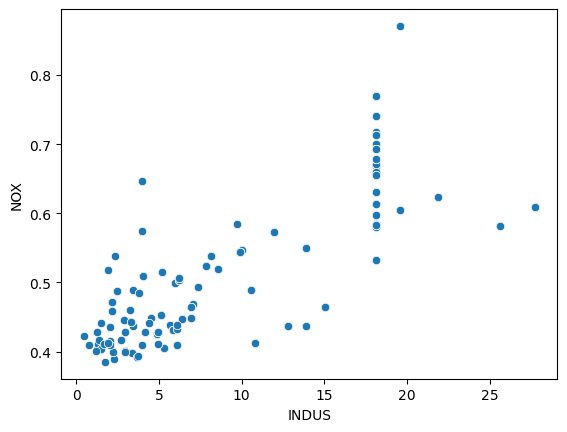

In [22]:
sns.scatterplot(data=boston_df,x='INDUS',y='NOX')

In [23]:
scipy.stats.pearsonr(boston_df['INDUS'], boston_df['NOX'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

As the pvalue is < 0.05 we can reject the null hypothesis and we can conclude that there **IS** a relation between NOX concentration and proportionof industrial activities, thus we cannot conclude that there is no relation between NOX concentration and proportion of no retail commercial activities.

Which is the impact of distance from occupational centers of Boston and median value of houses?

The Null hypothesis is that distance from occupational centers has no effect on median value of houses

<AxesSubplot:xlabel='DIS', ylabel='MEDV'>

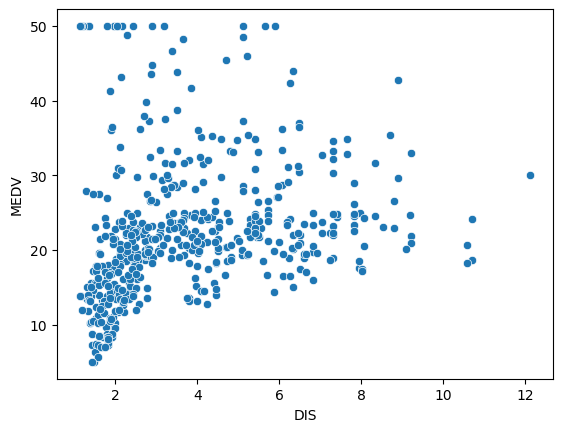

In [24]:
sns.scatterplot(data=boston_df,x='DIS',y='MEDV')

In [25]:
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 11 Jul 2024   Prob (F-statistic):           1.21e-08
Time:                        18:26:09   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
import math
math.sqrt(0.062)

0.24899799195977465

The two variables have a slight positive correlation and p-value is < 0.05 so we can reject the null hypothesis and conclude that the distance from occupational centers has an impact on median value of houses.